#  Etude de la consommation moyenne des différentes sources d'électricité 

In [4]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import pylab

# Paramètres d'affichage
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':35,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [5]:
# Création de notre jeu de données 
data = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')
#print(data.head(10))

# Nettoyage
conso1 = data.copy()
conso1 = conso1[['Date', 'Nucléaire (MW)', 'Gaz (MW)']]
conso1.dropna(inplace=True)

conso2 = data.copy()
conso2 = conso2[['Date', 'Charbon (MW)', 'Fioul (MW)']]
conso2.dropna(inplace=True)

conso3 = data.copy()
conso3 = conso3[['Date', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)']]
conso3.dropna(inplace=True)

C:\Users\Pauline\AppData\Local\Temp\ipykernel_7464\137300948.py:2: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')


In [8]:
# Changement du type de Series en datetime et changement d'index

conso1['Date'] = pd.to_datetime(conso1['Date'])
conso1.set_index('Date', inplace=True)
#print(conso1)

conso2['Date'] = pd.to_datetime(conso2['Date'])
conso2.set_index('Date', inplace=True)
#print(conso2)

conso3['Date'] = pd.to_datetime(conso3['Date'])
conso3.set_index('Date', inplace=True)
#print(conso3)

In [9]:
# On regroupe les données par jour
daily_groups1 = conso1.resample('D')
daily_data1 = daily_groups1.mean()
daily_data1.columns = ['Nucléaire','Gaz']
#print(daily_data1)

daily_groups2 = conso2.resample('D')
daily_data2 = daily_groups2.mean()
daily_data2.columns = ['Charbon', 'Fioul']
#print(daily_data2)

daily_groups3 = conso3.resample('D')
daily_data3 = daily_groups3.mean()
daily_data3.columns = ['Eolien', 'Solaire', 'Hydraulique' ]
#print(daily_data3)

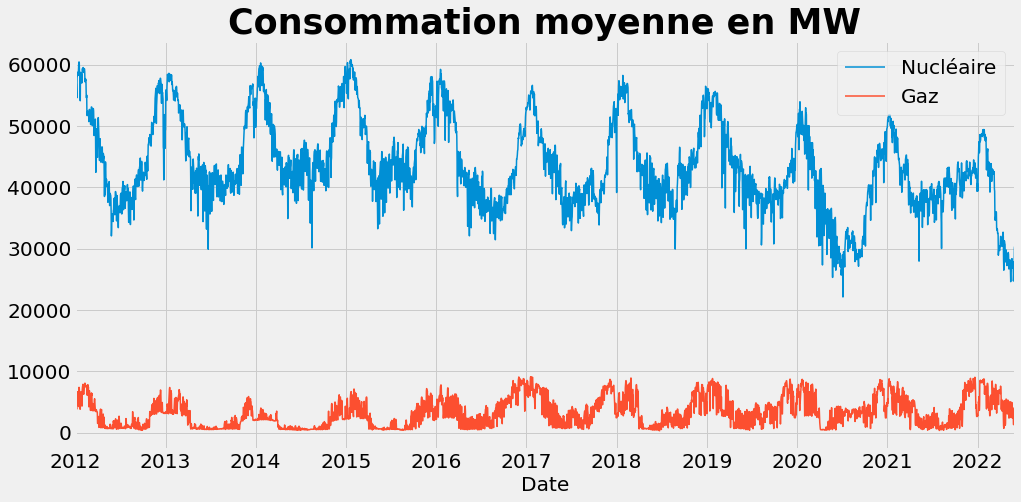

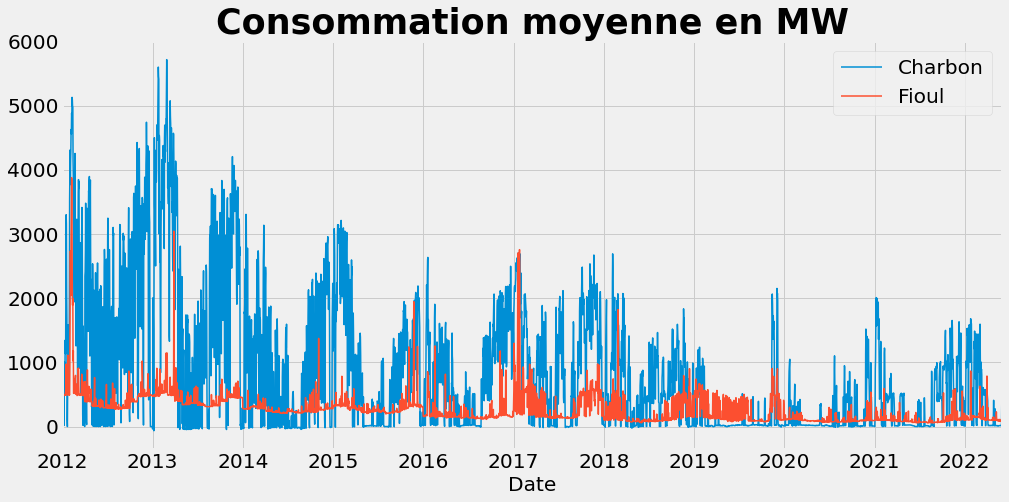

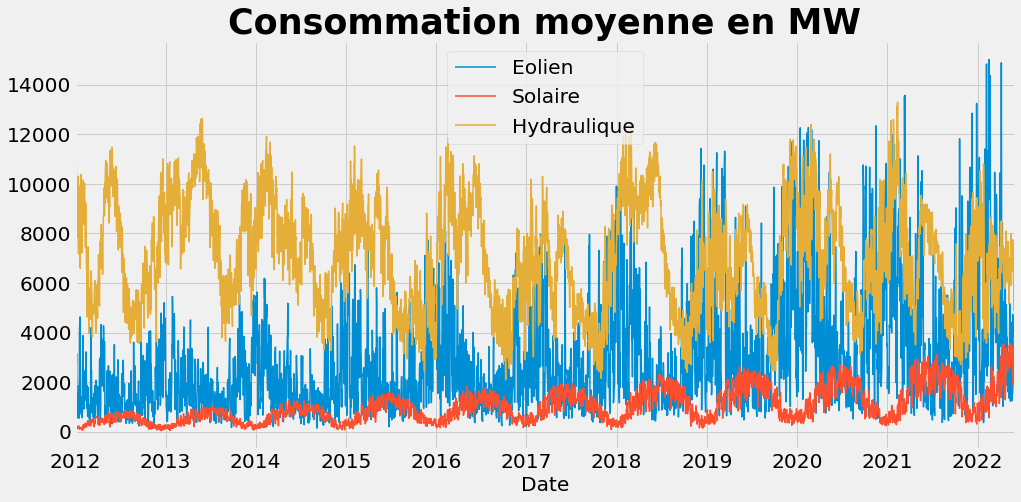

In [10]:
# Affichage des données
ax = daily_data1.plot(title='Consommation moyenne en MW', figsize=(15,7))
ax = daily_data2.plot(title='Consommation moyenne en MW', figsize=(15,7))
ax = daily_data3.plot(title='Consommation moyenne en MW', figsize=(15,7))

On peut observer un modèle se répétant chaque année pour chaque source d'énergie.

Pour les énergies dites propres/renouvelables:
- on peut voir que la consommation d'électricité due au solaire diminue durant l'hiver mais que son utilisation globale durant l'année augmente petit à petit
- pour l'hydraulique, on peut remarquer que son utilisation diminue à partir de mai/juin pour re-augmenter aux alentours de octobre/novembre
- pour l'eolien, la consommation d'énergie due aux eoliennes augmente généralement durant l'automne-hiver et diminue lors du printemps-été

Globalement, on peut constater que l'utilisation des énergies renouvelables augmente petit à petit au cours des années. 

Pour les énergies dites fossiles:
- l'utilisation du fioul augmente considérablement durant l'automne-hiver (sauf peut-être en 2019), cependant on peut voir que son utilisation diminue au fils des ans
- le charbon suit à peu près le même schéma que le fioul avec cependant une utilisation plus importante
- de même pour le gaz, son utilisation augmente durant l'hiver et diminue durant l'été avec une consommation au fils des ans assez constante

Pour l'énergie dite fissile (ou atomique), c'est à dire l'énergie due au nucléaire, on peut remarquer que son utilisation augmente chaque hiver et que sa consommation globale diminue petit à petit au cours des années.